Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Hannah Lange"
COLLABORATORS = ""

---

## 1D Ising – Regression

In the lecture we have shown different performances of linear regression on predicting the energy in
the 1D Ising model depending on our choice of regularisation. The aim of this exercise is to analyse
this performance a bit further.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


Fill in the class IsingData below as specified in the code. Consider the cell with the shape tests.

In [18]:

class IsingData:
    def __init__(self, size=40, num_states=1000):
        """
        Create Dataset of random 1D Ising states. For shapes of the np.ndarrays see test cell below.
        """
        self.size = size
        self.num_states = num_states

        self.states = None
        self.generate_random_states()
        self.reshaped_states = None
        self.reshape_states()

        self.coupling = None
        self.calculate_coupling()

        self.energies = None
        self.calculate_energies()

        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None

        self.split_train_test()

    def calculate_coupling(self):
        """
        Calculate the nearest neighbour coupling of the 1D Ising model with coupling strength 1 and periodic 
        boundary conditions. Write the result to self.coupling. You should get a np.ndarray of shape 
        (self.size, self.size). The function must not return anything.
        """
        # YOUR CODE HERE
        coupling=np.zeros((self.size,self.size))
        J = 1
        for i in range(self.size):
            coupling[i,(i+1)%self.size]-= J
        self.coupling = coupling

    def calculate_energies(self):
        """
        Calculate the energies for all ising states and write them to self.energies. You should get a np.ndarray with
        shape (self.num_states,)
        """
        if type(self.coupling) != np.ndarray or self.coupling.shape != (self.size, self.size):
            raise ValueError("The coupling has to be a numpy array of shape (self.size, self.size)")
        # YOUR CODE HERE
        self.energies = np.einsum('ki,ij,kj->k',self.states, self.coupling, self.states)
        self.energies.reshape((self.num_states,))
        #print(self.energies.shape)
        

    def generate_random_states(self):
        """
        Generate the random Ising states. Nothing for you to do here.
        """
        self.states = np.random.choice([-1, 1], size=(self.num_states, self.size))

    def split_train_test(self, test_fraction=0.25):
        """
        Split the dataset (reshaped states) into train and test set and write the result to self.x_train, self.y_train,
        self.x_test and self.y_test.
        """
        # YOUR CODE HERE
        num_train = int(self.num_states*(1-test_fraction))
        self.x_train = self.reshaped_states[:num_train]
        self.y_train = self.energies[:num_train]
        self.x_test = self.reshaped_states[num_train :]
        self.y_test = self.energies[num_train :]

    def reshape_states(self):
        """
        Reshape the Ising states so that the Regressors can handle them sensibly. Nothing for you to do here.
        """
        ising_states = np.einsum('...i,...j->...ij', self.states, self.states)
        shape = ising_states.shape
        self.reshaped_states = ising_states.reshape((shape[0], -1))

In [19]:
# You can check your shapes here!
ising_data = IsingData()
assert ising_data.states.shape == (ising_data.num_states, ising_data.size)
assert ising_data.reshaped_states.shape == (ising_data.num_states, ising_data.size ** 2)
assert ising_data.coupling.shape == (ising_data.size, ising_data.size)
assert ising_data.energies.shape == (ising_data.num_states,)
assert ising_data.x_test.shape[1] == ising_data.size ** 2
assert ising_data.x_test.shape[0] < ising_data.num_states

In [20]:
# Your code will be autograded here!


In [21]:
# Your code will be autograded here!

Fill in the class RegressionModel below as specified in the code. Consider the cell with the shape tests.

In [22]:
class RegressionModel:
    def __init__(self, data: IsingData, model_type, lbdas):
        """
        Create Model class for the Regressor of a specific type. Nothing for you to do here.
        """
        if model_type not in ["ols", "ridge", "lasso"]:
            raise ValueError("model_type has to be 'ols', 'ridge', or 'lasso'")
        self.data = data

        self.model_type = model_type
        self.lbdas = lbdas

        self.model = None

        self.errors = []

    def build_model(self, lbda):
        """
        Build a model of type self.model_type and assign the regularization parameter where possible. self.model_type
        can be "ols", "ridge", or "lasso". Use conditionals to get the correct class from sklearn for each case and
        write the result to self.model.
        """
        # YOUR CODE HERE
        if self.model_type == "ols":
            self.model = LinearRegression()
        if self.model_type == "ridge":
            self.model = Ridge(alpha = lbda)
        if self.model_type == "lasso":
            self.model = Lasso(alpha = lbda)
            
            
    def fit_model(self):
        """
        Fit the model.
        """
        # YOUR CODE HERE
        self.model.fit(self.data.x_train, self.data.y_train)

    def predict_energies(self):
        """
        Predict the energies, save the error to self.errors (hint: other method) and return the prediction.
        """
        # YOUR CODE HERE
        prediction = self.model.predict(self.data.x_test)
        # errors? bisher in calculate_error()
        return prediction
        
    def calculate_error(self, prediction):
        """
        Calculate the Mean Squared Error for the prediction to evaluate the performance of
        your model. Append the result to self.errors!
        """
        # YOUR CODE HERE
        self.errors.append(mean_squared_error(prediction, self.data.y_test))

    def calculate_errors_for_lbdas(self):
        """
        Calculate the model, the prediction and the error for all values in self.lbdas and store the errors in 
        self.errors (hint: use self.predict_energies() and self.calculate_error()).
        """
        # YOUR CODE HERE
        for lbda in self.lbdas:
            self.build_model(lbda)
            self.fit_model()
            prediction = self.predict_energies()
            self.calculate_error(prediction)

    def plot_errors(self, new_figure=False, show_plot=False):
        """
        We wrote the plotting for you so that you can concentrate on the content.
        """
        if new_figure:
            fig = plt.figure(figsize=(15, 15))
            fig = plt.gcf()
            fig.set_size_inches(10.0, 6.0)

        plt.semilogx(self.lbdas, self.errors, label='E_out ' + self.model_type)

        plt.legend(loc='lower left', fontsize=16)
        plt.xlabel(r'$\lambda$', fontsize=16)
        plt.ylabel('MSE', fontsize=16)
        plt.tick_params(labelsize=16)
        plt.title('Performance for ' + str(self.data.num_states) + ' samples')
        if show_plot:
            plt.show()

In [23]:
# Checks for your shapes
data = IsingData()
model = RegressionModel(data, "ols", np.array([1, 2]))
assert type(model.data) == IsingData
assert type(model.errors) == list
assert len(model.errors) == 0
model.calculate_errors_for_lbdas()
assert len(model.errors) == len(model.lbdas)
assert model.predict_energies().shape == model.data.y_test.shape


In [24]:
# Your code will be autograded here!

In [25]:
# Your code will be autograded here!

In [26]:
# Your code will be autograded here!

Calculate and visualize the test error for the given regularizations and different data sizes [500, 1000, 2000] for all three types of regressor using the classes we have written above. Use the methods calculate_errors_for_lbdas() and plot_errors() to generate the relevant information. Generate one plot for each sample size with three lines (one per regressor) each.

C:\Users\hanna\anaconda3\envs\MLinPhysics\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.513469077469437, tolerance: 1.5462399999999996
  model = cd_fast.enet_coordinate_descent(


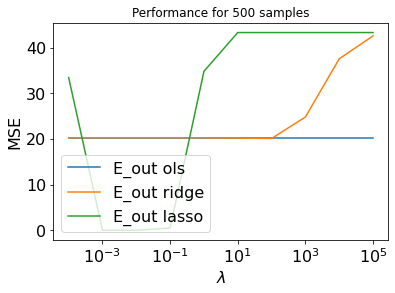

C:\Users\hanna\anaconda3\envs\MLinPhysics\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.359732667129034, tolerance: 3.0527232000000004
  model = cd_fast.enet_coordinate_descent(


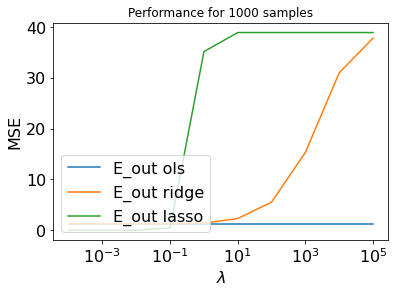

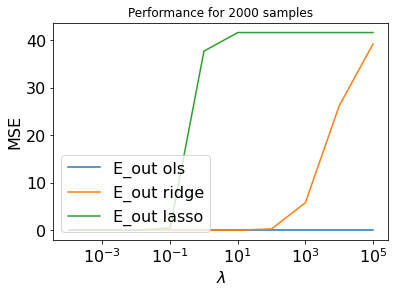

In [27]:
figs = []

lbdas = np.logspace(-4, 5, 10)
sample_sizes = [500, 1000, 2000]


for num_samples in sample_sizes:
    fig = plt.figure()
    # YOUR CODE HERE
    data = IsingData(num_states = num_samples)
    for model_type in ["ols", "ridge", "lasso"]:
        model = RegressionModel(data, model_type, lbdas)
        model.calculate_errors_for_lbdas()
        model.plot_errors()
        
    figs.append(fig)
    plt.show()


Comment on your findings with the different sample sizes and different regularizations.

In [23]:
# Your code will be autograded here!